In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA 
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from  sklearn.linear_model import LogisticRegression

In [40]:
data = sns.load_dataset("iris")
data.head() 


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Separation du jeu de donnees 

In [3]:
X = data.drop(columns=["species"])
y = data.loc[:, "species"]


#### Normalisation du jeu entrainement 

In [42]:
target_names = list(X.columns)
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X_scaler = pd.DataFrame(X_scaler, columns=target_names )
X_scaler 

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


#### Reduction de dimension avec ACP 

In [72]:
pca = PCA(n_components=2)
pca.fit(X_scaler)
X_reduced = pca.transform(X_scaler)


In [74]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, train_size=0.7, random_state=49)

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [38]:
model.score(X_test, y_test)

0.9333333333333333

#### visualiation avec ACP 

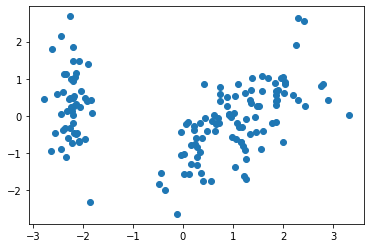

In [53]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

In [49]:
X_reduced.shape

(150, 2)

In [58]:
X_reduced_df = pd.DataFrame(X_reduced, columns=["pc1", "pc2"])
X_reduced_df = pd.concat([X_reduced_df, data.species], axis=1 )
X_reduced_df

,pc1,pc2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


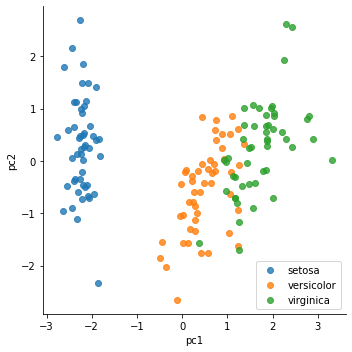

In [59]:

 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="pc1", y="pc2", data=X_reduced_df, fit_reg=False, hue='species', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()